In [1]:
import ctypes
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils

import importlib
import utils

# importlib.reload(utils)

In [2]:
binary = ctypes.CDLL( "build/sharedLibrary.so" )
binary.benchLockOMP.restype = utils.benchData
binary.benchCriticalOMP.restype = utils.benchData
binary.benchTAS.restype = utils.benchData
binary.benchTATAS.restype = utils.benchData
binary.benchTicket.restype = utils.benchData
binary.benchArray.restype = utils.benchData
binary.benchCLH.restype = utils.benchData
binary.benchMCS.restype = utils.benchData
binary.benchHemlock.restype = utils.benchData

In [9]:
maxThreads = 10
total_acqs = 50
bench_iters = 50

threadNum = [i for i in range(2, maxThreads+1)]
# bmListLockOMP = {threads: [binary.benchLockOMP(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
# bmListCriticalOMP = {threads: [binary.benchCriticalOMP(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
# bmListTAS = {threads: [binary.benchTAS(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
# bmListTATAS = {threads: [binary.benchTATAS(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
# bmListTicket = {threads: [binary.benchTicket(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListArray = {threads: [binary.benchArray(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
print("hi")# bmListCLH = {threads: [binary.benchCLH(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
# bmListMCS = {threads: [binary.benchMCS(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
# bmListHemlock = {threads: [binary.benchHemlock(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}

# df_LockOMP = utils.dataframeBuilder(bmListLockOMP).fillna(0)
# df_CriticalOMP = utils.dataframeBuilder(bmListCriticalOMP).fillna(0)
# df_TAS = utils.dataframeBuilder(bmListTAS).fillna(0)
# df_TATAS = utils.dataframeBuilder(bmListTATAS).fillna(0)
# df_Ticket = utils.dataframeBuilder(bmListTicket).fillna(0)
df_array = utils.dataframeBuilder(bmListArray).fillna(0)
# df_CLH = utils.dataframeBuilder(bmListCLH).fillna(0)
# df_MCS = utils.dataframeBuilder(bmListMCS).fillna(0)
# df_Hemlock = utils.dataframeBuilder(bmListHemlock).fillna(0)

hi


In [10]:
print(df_array)

   threads  meanTime  stddTime   meanFail      stddFail      meanWait  \
0        2  0.024517  0.002029    1313.98  5.836945e+03  2.856928e-07   
1        3  0.025453  0.003672    1189.68  1.063972e+03  4.313004e-07   
2        4  0.028081  0.005087    1348.38  1.447476e+03  4.956492e-07   
3        5  0.024811  0.003572   28528.74  1.547101e+05  3.489567e-06   
4        6  0.026189  0.002468    8819.26  3.589567e+04  1.958330e-06   
5        7  0.028842  0.003137   20202.94  9.428845e+04  3.901603e-06   
6        8  0.029967  0.002754   11927.52  5.483434e+04  2.760926e-06   
7        9  0.030358  0.004144  222993.28  1.491554e+06  4.318788e-05   
8       10  0.029453  0.002913   10744.32  1.563676e+04  3.422605e-06   

       stddWait  meanFair   stddFair       meanTP      stddTP  
0  5.419214e-07     15.76  33.989740  2088.776026  166.817111  
1  2.508505e-07     33.04  42.828477  2067.152424  302.551613  
2  2.970758e-07     55.28  38.648695  1907.111687  330.078444  
3  1.484422e-

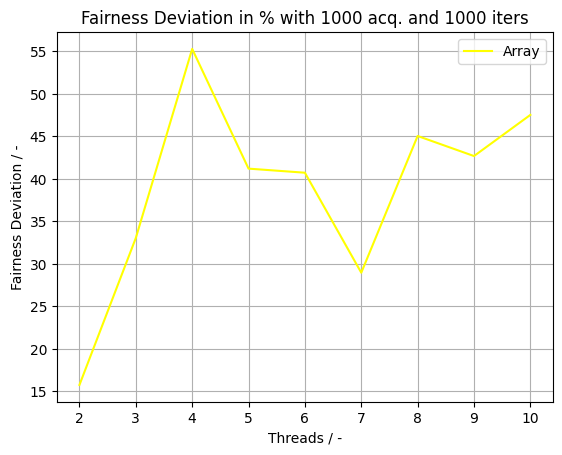

In [11]:
plotWhat = "Fair"
LockList = ["OMP Lock", "OMP Critical", "TAS", "TATAS", "Ticket", "Array", "CLH", ]

# utils.plotStuff("threads", plotWhat, "OMP Lock", df_LockOMP, "black")
# utils.plotStuff("threads", plotWhat, "OMP Critical", df_CriticalOMP, color = "red")
# utils.plotStuff("threads", plotWhat, "TAS", df_TAS, "blue")
# utils.plotStuff("threads", plotWhat, "TATAS", df_TATAS, "green")
# utils.plotStuff("threads", plotWhat, "Ticket", df_Ticket, "magenta")
utils.plotStuff("threads", plotWhat, "Array", df_array, "yellow")
# utils.plotStuff("threads", plotWhat, "CLH", df_CLH, "violet")
# utils.plotStuff("threads", plotWhat, "MCS", df_MCS, "gray")
# utils.plotStuff("threads", plotWhat, "Hemlock", df_MCS, "orange")

plt.title("Fairness Deviation in % with 1000 acq. and 1000 iters")
plt.xlabel("Threads / -")
plt.ylabel("Fairness Deviation / -")
plt.legend()
plt.grid()